In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [103]:
match=pd.read_csv("matches.csv")
match1=pd.read_csv("matches.csv")
match1.shape

(636, 18)

In [3]:
match1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match1.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [5]:
#total number of matches in the dataset
match1['id'].max()


636

In [6]:
#total number of matches in the dataset
match1['id'].max()


636

In [7]:
#matches with no result
match1[pd.isnull(match1.winner)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [9]:
match1['winner'].fillna('Draw', inplace=True)

In [10]:
match1[pd.isnull(match1.winner)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [11]:
match1.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
match1.replace(encode, inplace=True)
match1.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [12]:
match1[pd.isnull(match1.city)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [13]:
match1.city.fillna('city', inplace=True)

In [14]:
#find key by value search 
code = encode['winner']
print(code['MI']) #key value
print(list(code.keys())[list(code.values()).index(1)]) 

1
MI


In [15]:
match2 = match1[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
match2.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3


In [16]:
match2 = pd.DataFrame(match2)
match2.describe()

,team1,team2,toss_winner,winner
count,636.000000,636.000000,636.000000,636.000000
mean,5.540881,5.511006,5.371069,5.309748
std,3.329169,3.341677,3.293140,3.288726
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,9.000000,8.000000,7.250000,8.000000
max,13.000000,13.000000,13.000000,14.000000


In [17]:
t1=match2['toss_winner'].value_counts(sort=True)
t2=match2['winner'].value_counts(sort=True)
print('No of toss winners by each team')
for idx, val in t1.iteritems():
   print('{} -> {}'.format(list(code.keys())[list(code.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in t2.iteritems():
   print('{} -> {}'.format(list(code.keys())[list(code.values()).index(idx)],val))

No of toss winners by each team
MI -> 85
KKR -> 78
DD -> 72
RCB -> 70
KXIP -> 68
CSK -> 66
RR -> 63
DC -> 43
SRH -> 35
PW -> 20
GL -> 15
RPS -> 13
KTK -> 8
No of match winners by each team
MI -> 92
CSK -> 79
KKR -> 77
RCB -> 73
KXIP -> 70
RR -> 63
DD -> 62
SRH -> 42
DC -> 29
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Draw -> 3


In [19]:
ypos= np.arange(len(match2.winner))
ypos

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

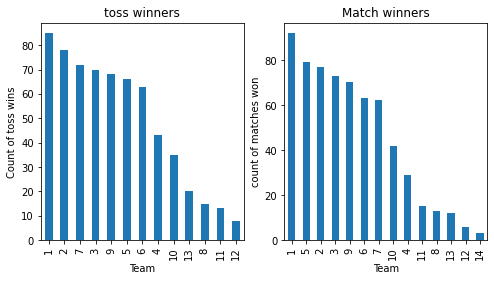

In [20]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
t1.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")
t2.plot(kind = 'bar')

In [24]:
#find out null values
match2.apply(lambda x: sum(x.isnull()),axis=0) 

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

NameError: name 'df' is not defined

In [40]:
x = match2.drop(['city','toss_decision','venue'],axis='columns')
y=match2.winner
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [98]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'logistic_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,logistic_regression,1.000000,{'normalize': True}
1,lasso,0.991338,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,1.000000,"{'criterion': 'mse', 'splitter': 'best'}"


In [70]:
#building predictive model
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    match2[i] = le.fit_transform(match2[i])
match2.dtypes 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold as kf  #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics



In [80]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))


In [81]:
from sklearn.ensemble import RandomForestRegressor
outcome_var=['winner']
predictor_var = ['team1','team2','toss_winner']
model = LogisticRegression()
classification_model(model, match2,predictor_var,outcome_var)

Accuracy : 24.057%


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [82]:
match2.head(3)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,13,1,3,23,10
1,1,11,24,1,11,16,11
2,8,2,26,1,2,25,2


In [83]:
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 89.151%


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1='RCB'
team2='KKR'
toss_winner='RCB'
input=[code[team1],code[team2],'14',code[toss_winner],'2','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(code.keys())[list(code.values()).index(output)]) #find key by value search output

KKR


In [87]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'


team1='DC'
team2='DD'
toss_winner='DC'
input=[code[team1],code[team2],'23',code[toss_winner],'14','0']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(code.keys())[list(code.values()).index(output)]) #find key by value search output

DD


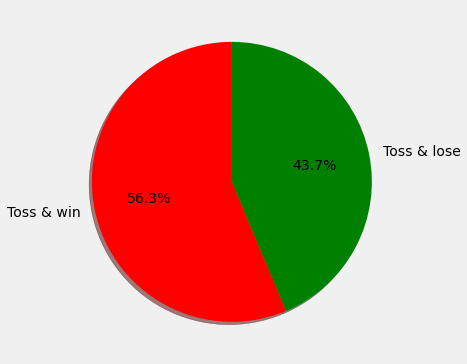

In [88]:
#okay from the above prediction on features, we notice toss winner has least chances of winning matches
#but does the current stats shows the same result
#df.count --> 577 rows
#Previously toss_winners were about 50.4%, with 2017 IPL season, it has reached 56.7%. As data matures, so does
# the changes in the predictions
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==df['winner']]
slices=[len(df_fil),(577-len(df_fil))]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()
# Toss winning does not gaurantee a match win from analysis of current stats and thus 
#prediction feature gives less weightage to that 

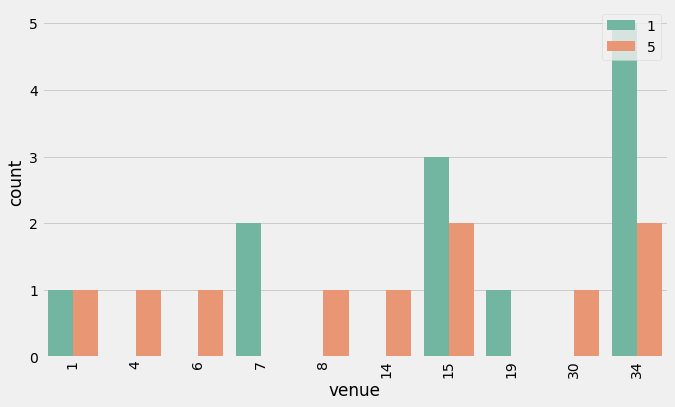

In [92]:
#top 2 team analysis based on number of matches won against each other and how venue affects them?
#Previously we noticed that CSK won 79, RCB won 70 matches
#now let us compare venue against a match between CSK and RCB
#we find that CSK has won most matches against RCB in MA Chidambaram Stadium, Chepauk, Chennai
#RCB has not won any match with CSK in stadiums St George's Park and Wankhede Stadium, but won matches
#with CSK in Kingsmead, New Wanderers Stadium.
#It does prove that chances of CSK winning is more in Chepauk stadium when played against RCB.
# Proves venue is important feature in predictability
import seaborn as sns
team1=code['MI']
team2=code['CSK']
mtemp=match2[((match2['team1']==team1)|(match2['team2']==team1))&((match2['team1']==team2)|(match2['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp,palette='Set2')
mlt.xticks(rotation='vertical')
leg = mlt.legend( loc = 'upper right')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()


In [93]:
le.classes_[34]

34

In [95]:
match1.city

0      Hyderabad
1           Pune
2         Rajkot
3         Indore
4      Bangalore
         ...    
631       Raipur
632    Bangalore
633        Delhi
634        Delhi
635    Bangalore
Name: city, Length: 636, dtype: object

In [96]:
match2.city

0      13
1      24
2      26
3      14
4       2
       ..
631    25
632     2
633     9
634     9
635     2
Name: city, Length: 636, dtype: int64

In [97]:
team1='CSK'
team2='MI'
toss_winner='CSK'
input=[code[team1],code[team2],'34',code[toss_winner],'2','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(code.keys())[list(code.values()).index(output)]) #find key by value search output

MI


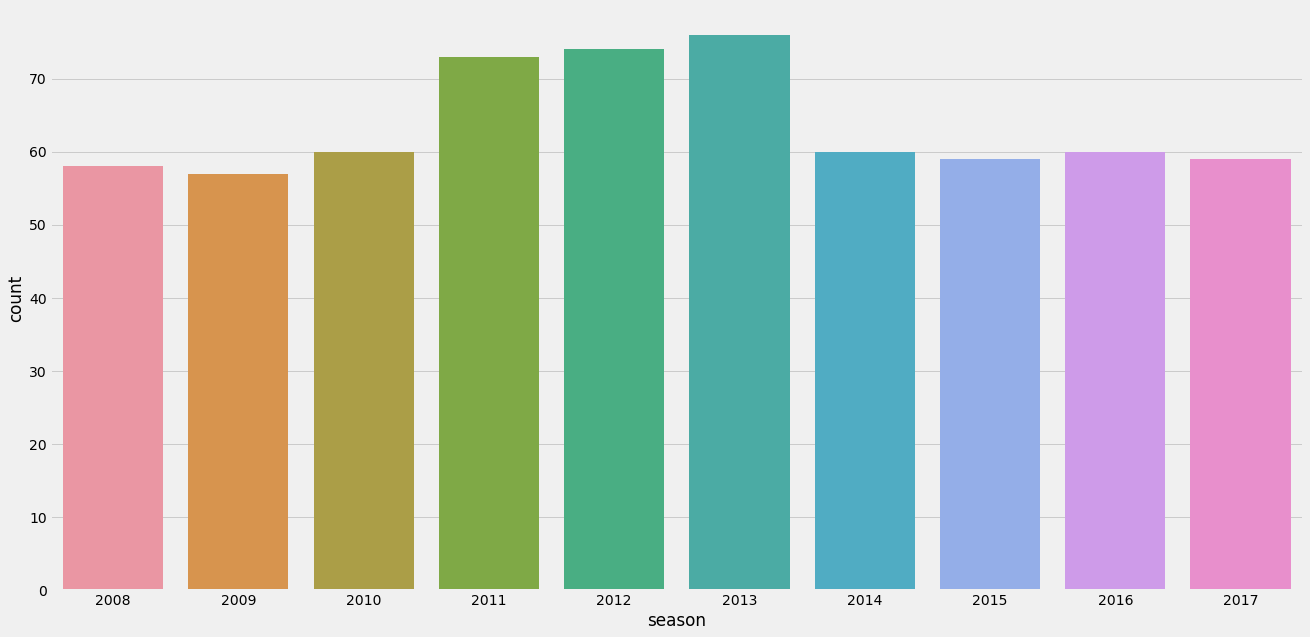

In [100]:
sns.countplot(x='season', data=match1)
plt.show()

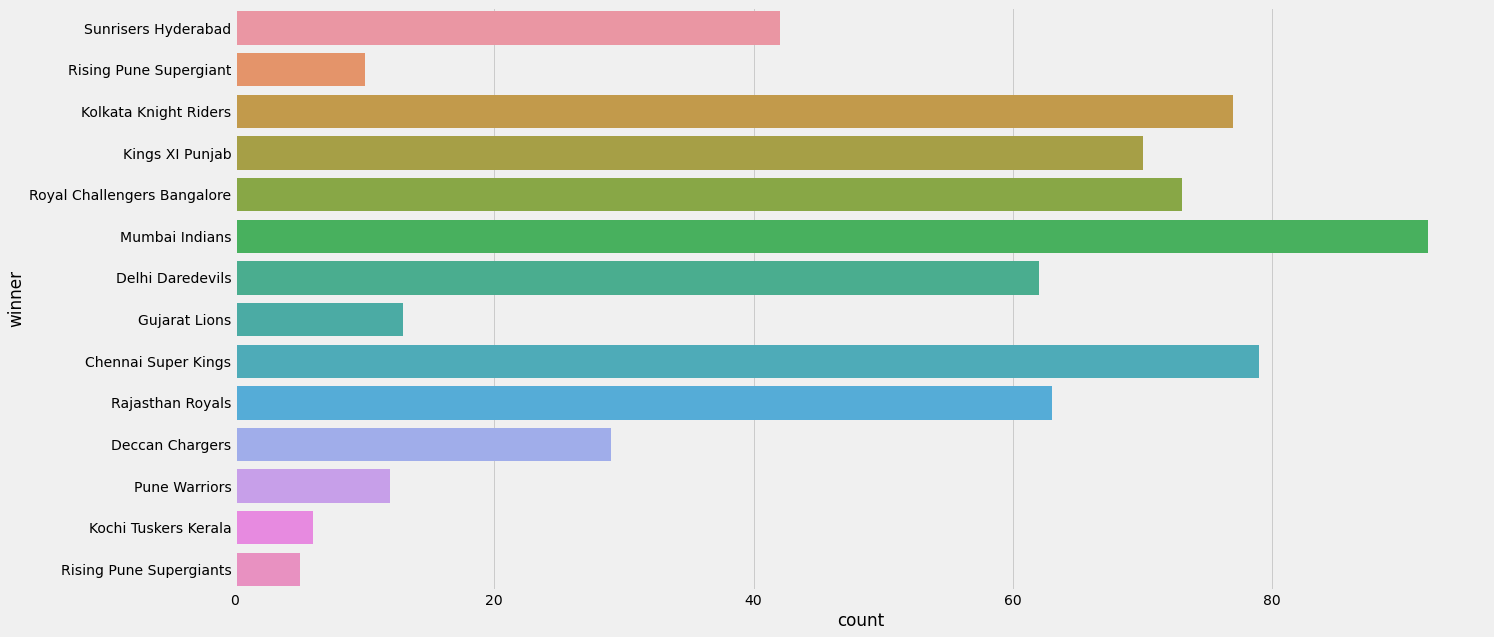

In [104]:
sns.countplot(y='winner', data = match)
plt.show()

In [106]:
#toss winning has helped?
ss = match2['toss_winner'] == match2['winner']

ss.groupby(ss).size()

False    311
True     325
dtype: int64

In [107]:
#%of winning after toss winning
round(ss.groupby(ss).size() / ss.count() * 100,2)

False    48.9
True     51.1
dtype: float64

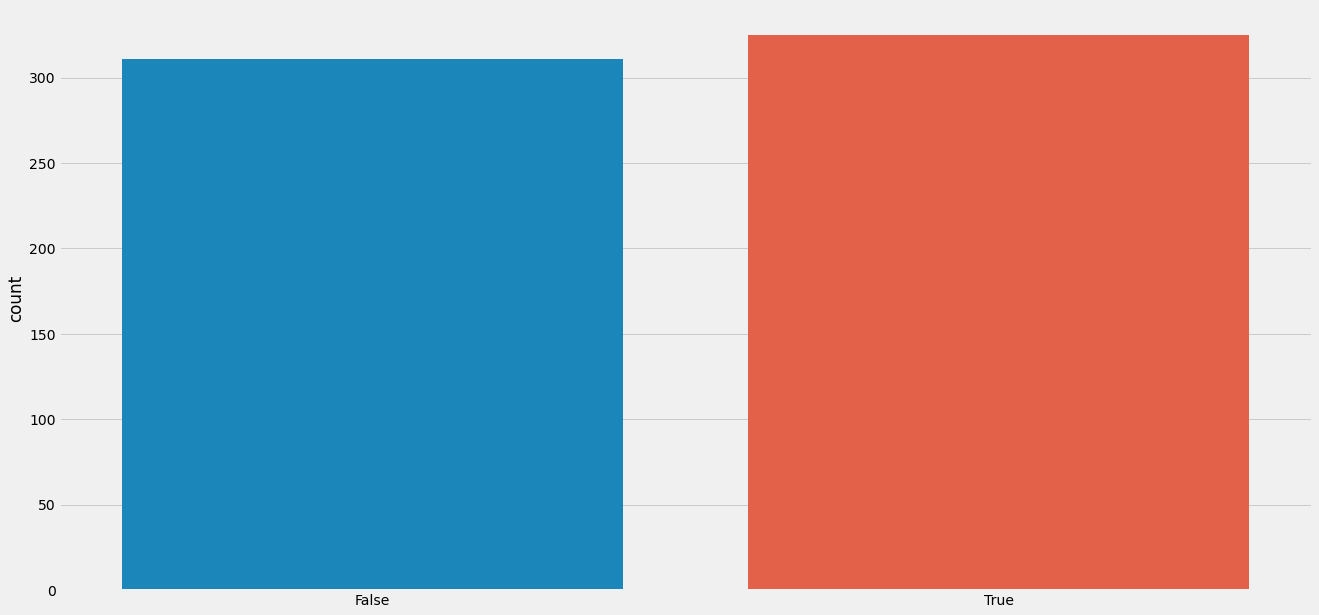

In [108]:
sns.countplot(ss);